In [32]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt

import meep as mp
from meep import mpb

import sys, os
sys.path.append('../../../lib')
sys.path.append('..')
from meep_nb import *
from partial_wgs import *

%config InlineBackend.figure_format = 'retina'
from matplotlib.backends.backend_pdf import PdfPages
    

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


(224, 160)

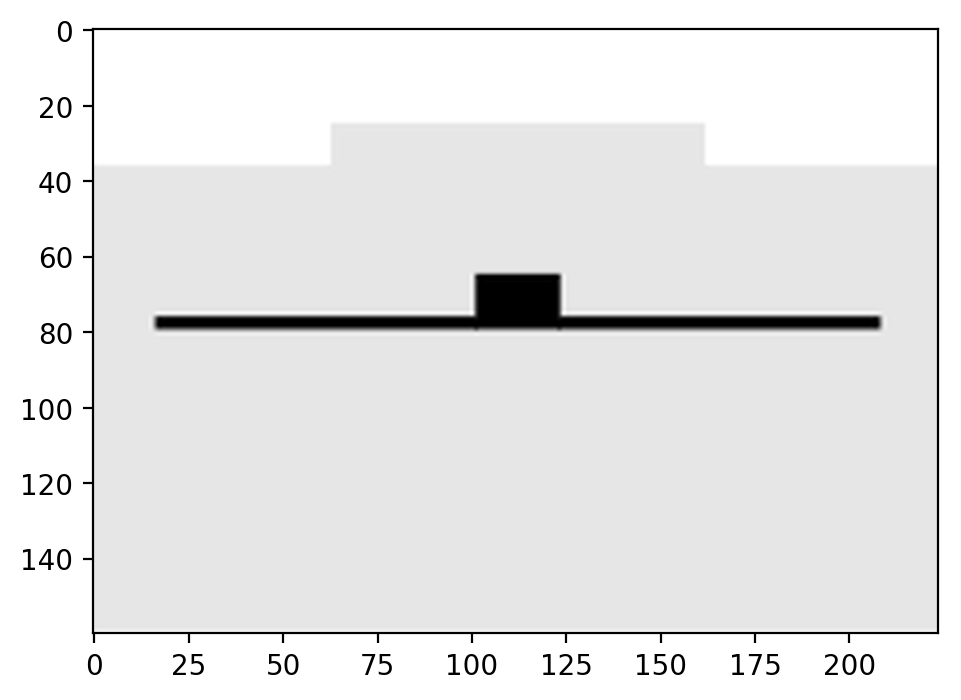

In [33]:
ms = get_ms(geom=get_xs(.35, two_wg_gap=None, encapsulation=.6))
ms.init_params(mp.NO_PARITY, reset_fields=True)
show_geometry(ms, periods=1).shape

## Compute k values over some variable. Pick one

In [35]:
kmat = []

wids = np.linspace(.2, .5, 3)
for wid in wids:
    ks = get_ks(xs=get_xs(wid, two_wg_gap=None, encapsulation=.6), freq=1/1.218, num_bands=1)
    kmat.append(ks)
    print('\nW={:.3f}\n'.format(wid))
xvar = wids
    
# gaps = np.linspace(.5, 1, 2)
# for gap in gaps:
#     ks = get_ks(xs=get_xs(two_wg_gap=gap), freq=1/1.218, num_bands=4)
#     kmat.append(ks)
#     print('\nW={:.3f}\n'.format(gap))
# xvar = gaps

Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<2.832512315270936, 0.0, 0.0>
elapsed time for initialization: 0.05365610122680664
elapsed time for k point: 0.23035597801208496
total elapsed time for run: 0.2848379611968994
done
find-k 1 at 2.832512315270936: 0.2796053930030259
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<0.08210180623973728, 0.0, 0.0>
elapsed time for initialization: 0.05535697937011719
elapsed time for k point: 0.10174202919006348
total elapsed time for run: 0.15735125541687012
done
find-k 1 at 0.08210180623973728: -0.763896313477439
Initializing eigensolver data
Computing 1 bands with 1e-07 tolerance
1 k-points
  Vector3<3.284072249589491, 0.0, 0.0>
elapsed time for initialization: 0.03923821449279785
elapsed time for k point: 0.2042999267578125
total elapsed time for run: 0.24372076988220215
done
find-k 1 at 3.284072249589491: 0.39321242757238173
Initializing eigensolver data
Comp

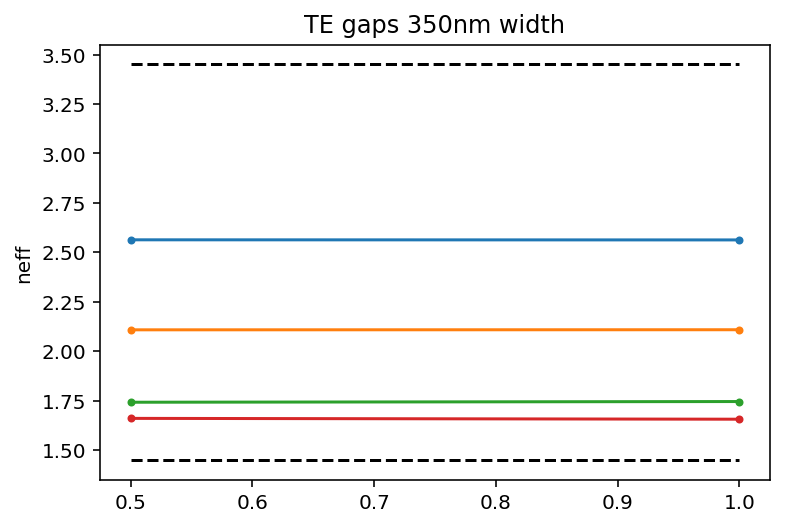

In [22]:
karr = np.array(kmat)
neffs = karr * 1.218

# plt.plot(wids, karr, '.-')
# plt.plot([wids[0], wids[-1]], [cutoff_k(1/1.218)]*2, '--k')

plt.plot(xvar, neffs, '.-')
plt.plot([xvar[0], xvar[-1]], [[3.45, 1.45]]*2, '--k')
plt.ylabel('neff')
plt.title('TE gaps 350nm width')

if True:
    with PdfPages('coupling_gaps.pdf') as pdf:
        pdf.savefig()

## Make a bragg grating

In [34]:
# For 1D calculations
from lightlab.util.data import MeasuredFunction
mf = MeasuredFunction(wids, neffs[:,0])


def bragg_bandgap(na, nb, center=1):
    # center can be frequency or wavelength
    # center=1 means it is fractional
    return np.arcsin(np.abs(na - nb) / (na + nb)) * center

def bragg_reflection(na, nb, num_periods):
    na_exp = na ** (2 * num_periods)
    nb_exp = nb ** (2 * num_periods)
    return ((na_exp - nb_exp) / (na_exp + nb_exp)) ** 2

In [63]:
wl = 1.218
sm_wg = 0.350
dn = .15
Nper = 20

# get index for the input waveguide
print('Wavelength', wl)
nwg = mf(sm_wg)
print('SM neff', nwg)

# calculate the two WG widths and lengths (duty is assumed 0.5)
n1 = nwg + dn/2
n2 = nwg - dn/2
print('wid1', mf.invert(n1))
print('wid2', mf.invert(n2))
print('period', wl/2/nwg)

# bandgap
print('Bandwidth', bragg_bandgap(n1, n2, wl) *1e3, 'nm')

# some reflections
for per in [1, 5, 10, 20, 40, 60, 80, 100]:
    print('Reflection:', per, '=', bragg_reflection(n1, n2, per))


# print(mf(.350))

# get the width for this neff
# dn = .16
# print(mf.invert(mf(.350) - dn/2))

Wavelength 1.218
SM neff 2.5623471604618224
wid1 0.3859158914382134
wid2 0.32088948618694646
period 0.2376727125024844
Bandwidth 35.65599940313596 nm
Reflection: 1 = 0.0034210761882610854
Reflection: 5 = 0.08105135907936595
Reflection: 10 = 0.2774135300174629
Reflection: 20 = 0.6800245730442949
Reflection: 40 = 0.9637254539363201
Reflection: 60 = 0.9964552823174527
Reflection: 80 = 0.9996587737496491
Reflection: 100 = 0.9999672000218648


In [18]:
1.218/2/2.517

0.24195470798569726

## Coupling gap